# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.

(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [1]:
import numpy as np

np.random.seed(42)
mu=0
sigma=1
n_samp=10

samples = np.random.normal(mu, sigma,n_samp)


mean = np.mean(samples)
print(f'mean = {mean}')
var_bias = np.var(samples)
print(f'biased variance = {var_bias}')
var_nbias = np.var(samples, ddof=1)
print(f'unbiased variance = {var_nbias}')


mean = 0.44806111169875623
biased variance = 0.4704669452131567
unbiased variance = 0.5227410502368408


## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

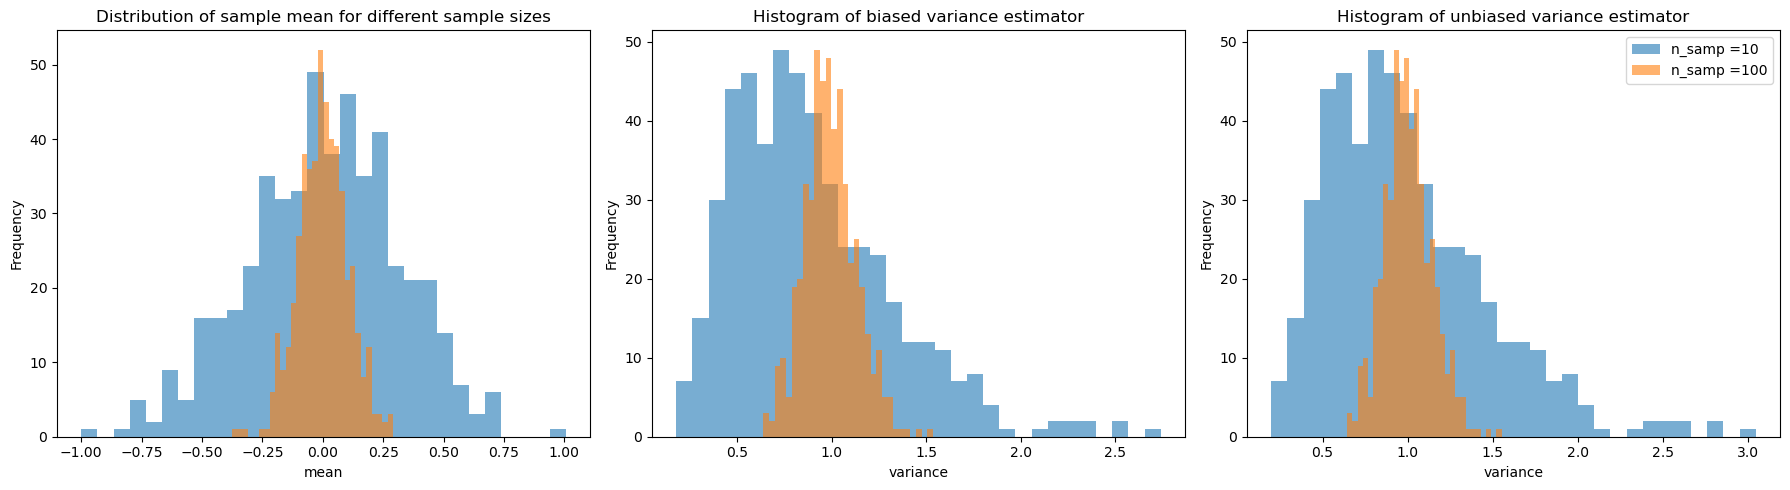

Conclusion:
With n_samp =10, the sample means are more spread out, resulting in a wider distribution. Increasing the size to n_samp=100 narrows the distribution of sample means, cluster them closer to the true mean which is 0. This behavior aligns with expectiations as a larger sample size generally provides a more accurate estimation of the mean.

Both of the variance estimators are normally distributed, so the expected value is the mean of the pdf
for n_samp=10
mean of the biased variance estimator = 0.8955171307535913, which has distance to the true value 0.1044828692464087
mean of the unbiased variance estimator = 0.9950190341706571, which has distance to the true value 0.0049809658293429315
for n_samp=100
mean of the biased variance estimator = 0.9918042144464562, which has distance to the true value 0.008195785553543833
mean of the unbiased variance estimator = 1.0018224388348043, which has distance to the true value 0.001822438834804263
Conclusion: the unbased variance estimate 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu=0
sigma=1
n_samp_small=10
n_samp_large=100

n = 500 #numbers for repeats
mean1 = np.zeros(n)
var1_bias = np.zeros(n)
var1_nbias = np.zeros(n)

#for 10 samples repeat 500 times
for i in range(n):
    samples = np.random.normal(mu, sigma, n_samp_small)
    mean1[i] = np.mean(samples)
    var1_bias[i] = np.var(samples)
    var1_nbias[i] = np.var(samples, ddof=1)

n = 500 #numbers for repeats
mean2 = np.zeros(n)
var2_bias = np.zeros(n)
var2_nbias = np.zeros(n)

#for 100 samples repeat 500 times 
for i in range(n):
    samples = np.random.normal(mu, sigma, n_samp_large)
    mean2[i] = np.mean(samples)
    var2_bias[i] = np.var(samples)
    var2_nbias[i] = np.var(samples, ddof=1)
    
fig, axs = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)
axs[0].hist(mean1, bins=30, alpha=0.6, label=f'n_samp =10')
axs[0].hist(mean2, bins=30, alpha=0.6, label=f'n_samp =100')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of sample mean for different sample sizes')


axs[1].hist(var1_bias, bins=30, alpha=0.6, label=f'n_samp =10')
axs[1].hist(var2_bias, bins=30, alpha=0.6, label=f'n_samp =100')
axs[1].set_xlabel('variance')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of biased variance estimator')


axs[2].hist(var1_nbias, bins=30, alpha=0.6, label=f'n_samp =10')
axs[2].hist(var2_nbias, bins=30, alpha=0.6, label=f'n_samp =100')
axs[2].set_xlabel('variance')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of unbiased variance estimator')

plt.legend()
plt.show()

mean_var1_bias = np.mean(var1_bias) 
d_mean_var1_bias =np.abs(np.mean(var1_bias) -1) #distance to the true value of variance 1
mean_var1_nbias = np.mean(var1_nbias)
d_mean_var1_nbias = np.abs(np.mean(var1_nbias) -1)

mean_var2_bias = np.mean(var2_bias) 
d_mean_var2_bias = np.abs(np.mean(var2_bias) -1)
mean_var2_nbias = np.mean(var2_nbias)
d_mean_var2_nbias = np.abs(np.mean(var2_nbias) -1)





print('Conclusion:')
print('With n_samp =10, the sample means are more spread out, resulting in a wider distribution. Increasing the size to n_samp=100 narrows the distribution of sample means, cluster them closer to the true mean which is 0. This behavior aligns with expectiations as a larger sample size generally provides a more accurate estimation of the mean.')
print()
print('Both of the variance estimators are normally distributed, so the expected value is the mean of the pdf')
print('for n_samp=10')
print(f'mean of the biased variance estimator = {mean_var1_bias}, which has distance to the true value {d_mean_var1_bias}')
print(f'mean of the unbiased variance estimator = {mean_var1_nbias}, which has distance to the true value {d_mean_var1_nbias}')
print('for n_samp=100')
print(f'mean of the biased variance estimator = {mean_var2_bias}, which has distance to the true value {d_mean_var2_bias}')
print(f'mean of the unbiased variance estimator = {mean_var2_nbias}, which has distance to the true value {d_mean_var2_nbias}')

print('Conclusion: the unbased variance estimate is more cloeser to the true value of the variance 1 than the biased one, as we increase the number of samples to 100, both the unbiased and biased variance are getting closer to the true value.')

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

mean of sample1.out = 0.6061677979776571
variance of sample1.out = 6.484724745036359


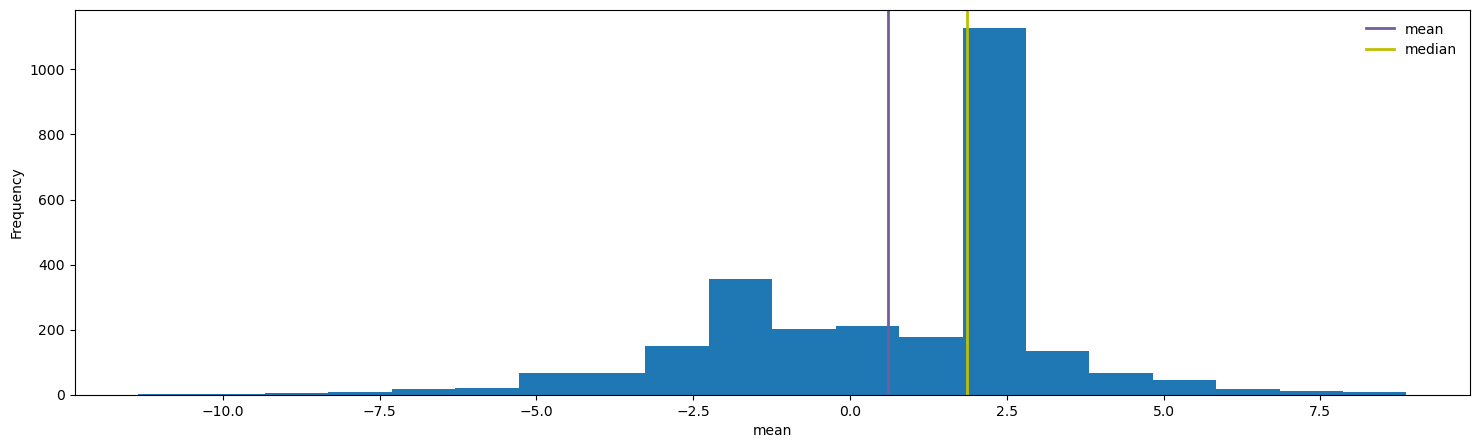

In [3]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data/sample1.txt')


class Statistic:
    def __init__(self, samples, var):
        self.var = var # 0 for biased and 1 for unbiased
        self.samples = samples
        
    def mean(self):
        return np.mean(self.samples)
    
    def mean_error(self):
        # to estimate the standard error, we will use the (biased) sample standard deviation as the true population standard deviation is unknown.
        return np.var(self.samples) / np.sqrt(len(self.samples))
    
    def variance(self):
        if self.var == 0:
            return np.var(self.samples)
        else:
            return np.var(self.samples, ddof=1)
    
    def variance_bias(self): # I dont have any idea on how to do this one
        if self.var == 0:
            return np.var(self.samples)
        else:
            return np.var(self.samples, ddof=1)
        
    def median(self):
        return np.median(self.samples)
        
# initialize the class
stat = Statistic(data, 1)
mean = stat.mean()
mean_error = stat.mean_error()
var = stat.variance()
median = stat.median()
print(f'mean of sample1.out = {mean}')
print(f'variance of sample1.out = {var}')
        
fig, ax = plt.subplots(figsize=(18, 5))
ax.hist(data, bins=20)
ax.set_xlabel('mean')
ax.set_ylabel('Frequency')
ax.axvline(x=mean, linewidth=2, color='#725e9c', label='mean')
ax.axvline(x=median, linewidth=2, color='y', label='median')
ax.legend(frameon=False)
plt.show()

[0.6061678  0.57190373 0.63122361 0.58619495 0.60854239 0.59107729
 0.53407429 0.59092154 0.57695594 0.61684183]

[6.48472475 6.58825209 6.64304178 6.74004977 6.28924576 6.62673519
 6.31287392 6.48136943 6.07229471 6.26325281]


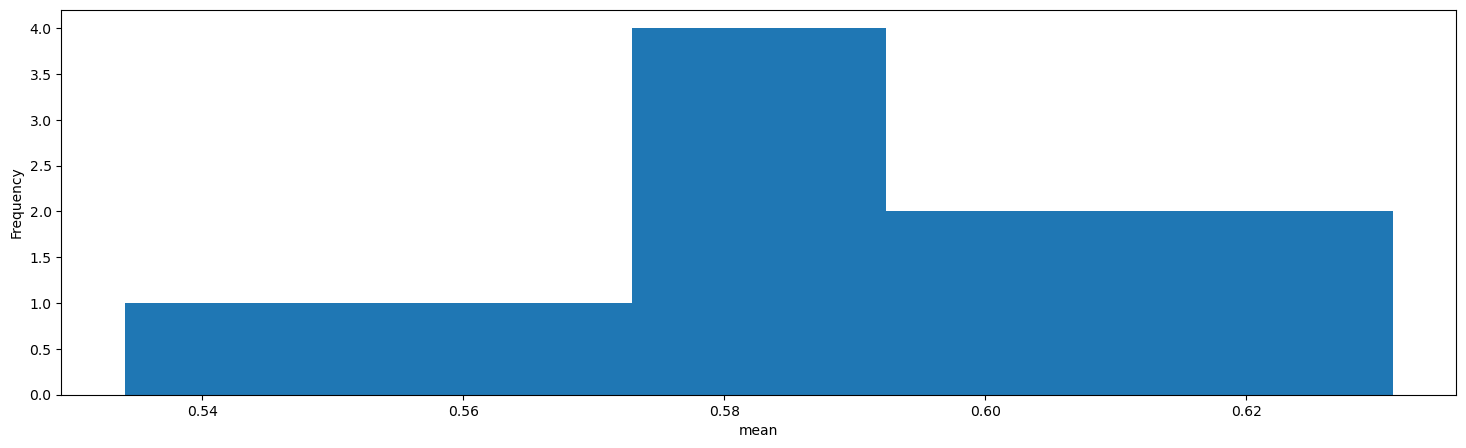

based on the trend in the distribution of the sample means, we believe that the samples were drawn from the same underlying distribution


In [4]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('data/sample1.txt')
data2 = np.loadtxt('data/sample2.txt')
data3 = np.loadtxt('data/sample3.txt')
data4 = np.loadtxt('data/sample4.txt')
data5 = np.loadtxt('data/sample5.txt')
data6 = np.loadtxt('data/sample6.txt')
data7 = np.loadtxt('data/sample7.txt')
data8 = np.loadtxt('data/sample8.txt')
data9 = np.loadtxt('data/sample9.txt')
data10 = np.loadtxt('data/sample10.txt')

means = np.zeros(10)
variances = np.zeros(10)
all_data = np.stack((data1, data2, data3, data4, data5, data6, data7, data8, data9, data10), axis=0)


for i in range(0, 10):
    stat = Statistic(all_data[i, :], 1)
    means[i] = stat.mean()
    variances[i] = stat.variance()

print(means)
print()
print(variances)

fig, ax = plt.subplots(figsize=(18, 5))
ax.hist(means, bins=5)
ax.set_xlabel('mean')
ax.set_ylabel('Frequency')
plt.show()

print('based on the trend in the distribution of the sample means, we believe that the samples were drawn from the same underlying distribution')

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.

(ii) Compare to the theoretical prediction using Poisson statistics.

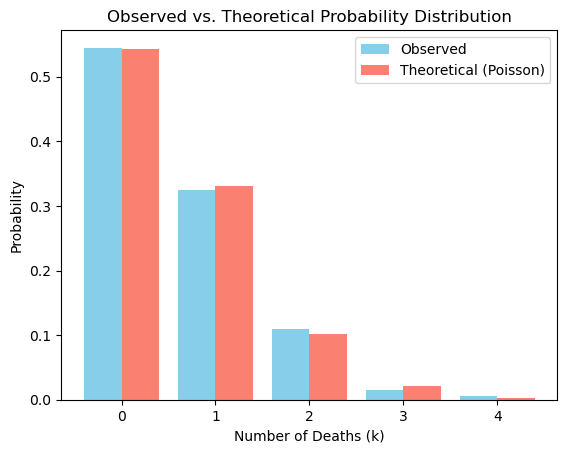

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

k_values = np.array([0, 1, 2, 3, 4])
groups = np.array([109, 65, 22, 3, 1])
total_groups = np.sum(groups)
P_observed = groups / total_groups

total_deaths = np.sum(k_values * groups)
lambda_ = total_deaths / total_groups  # λ ≈ 0.61

P_theoretical = poisson.pmf(k_values, lambda_)

plt.bar(k_values-0.2, P_observed, width=0.4, label='Observed', color='skyblue', align='center')
plt.bar(k_values+0.2, P_theoretical, width=0.4, label='Theoretical (Poisson)', color='salmon', align='center')

plt.xlabel('Number of Deaths (k)')
plt.ylabel('Probability')
plt.title('Observed vs. Theoretical Probability Distribution')
plt.xticks(k_values)
plt.legend()

plt.show()